<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.327653,65.086910,-68.449419,91.965144,136.021336,-44.056192
1,0.0,1.0,95.560129,74.652997,113.244903,293.458029,154.884962,138.573067
2,0.0,2.0,42.684649,27.144008,-19.096872,60.731785,59.275541,1.456244
3,0.0,3.0,72.772734,51.829445,55.769203,190.371382,111.400489,78.970893
4,0.0,4.0,36.825017,30.172211,-30.491913,46.505315,56.731067,-10.225752
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.043876,26.827304,-12.763986,105.107193,131.486920,-26.379727
29996,999.0,26.0,56.450079,91.892280,8.193981,166.536339,160.981260,5.555079
29997,999.0,27.0,94.398848,94.201313,-24.311599,174.288562,199.606186,-25.317624
29998,999.0,28.0,34.801899,64.760095,-19.154543,90.407451,117.800029,-27.392578


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    85.327653  65.086910  -68.449419   91.965144  136.021336   
      1.0    95.560129  74.652997  113.244903  293.458029  154.884962   
      2.0    42.684649  27.144008  -19.096872   60.731785   59.275541   
      3.0    72.772734  51.829445   55.769203  190.371382  111.400489   
      4.0    36.825017  30.172211  -30.491913   46.505315   56.731067   
...                ...        ...         ...         ...         ...   
999.0 25.0   81.043876  26.827304  -12.763986  105.107193  131.486920   
      26.0   56.450079  91.892280    8.193981  166.536339  160.981260   
      27.0   94.398848  94.201313  -24.311599  174.288562  199.606186   
      28.0   34.801899  64.760095  -19.154543   90.407451  117.800029   
      29.0   24.262144  80.789611  100.662914  215.714669  120.729023   

                  e_hat  
rep   index              
0.0   0.0    -44.056192  
      1.0    138.573067  
      2.0      1.456244  
      3.0     78.970893  
      4.0    -10.225752  
...                 ...  
999.0 25.0   -26.379727  
      26.0     5.555079  
      27.0   -25.317624  
      28.0   -27.392578  
      29.0    94.985646  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    85.327653  65.086910  -68.449419   91.965144  136.021336   
      1.0    95.560129  74.652997  113.244903  293.458029  154.884962   
      2.0    42.684649  27.144008  -19.096872   60.731785   59.275541   
      3.0    72.772734  51.829445   55.769203  190.371382  111.400489   
      4.0    36.825017  30.172211  -30.491913   46.505315   56.731067   
...                ...        ...         ...         ...         ...   
999.0 25.0   81.043876  26.827304  -12.763986  105.107193  131.486920   
      26.0   56.450079  91.892280    8.193981  166.536339  160.981260   
      27.0   94.398848  94.201313  -24.311599  174.288562  199.606186   
      28.0   34.801899  64.760095  -19.154543   90.407451  117.800029   
      29.0   24.262144  80.789611  100.662914  215.714669  120.729023   

                  e_hat  
rep   index              
0.0   0.0    -44.056192  
      1.0    138.573067  
      2.0      1.456244  
      3.0     78.970893  
      4.0    -10.225752  
...                 ...  
999.0 25.0   -26.379727  
      26.0     5.555079  
      27.0   -25.317624  
      28.0   -27.392578  
      29.0    94.985646  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.327653,65.086910,-68.449419,91.965144,136.021336,-44.056192
1,0.0,1.0,95.560129,74.652997,113.244903,293.458029,154.884962,138.573067
2,0.0,2.0,42.684649,27.144008,-19.096872,60.731785,59.275541,1.456244
3,0.0,3.0,72.772734,51.829445,55.769203,190.371382,111.400489,78.970893
4,0.0,4.0,36.825017,30.172211,-30.491913,46.505315,56.731067,-10.225752
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.043876,26.827304,-12.763986,105.107193,131.486920,-26.379727
29996,999.0,26.0,56.450079,91.892280,8.193981,166.536339,160.981260,5.555079
29997,999.0,27.0,94.398848,94.201313,-24.311599,174.288562,199.606186,-25.317624
29998,999.0,28.0,34.801899,64.760095,-19.154543,90.407451,117.800029,-27.392578


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    85.327653  65.086910  -68.449419   91.965144  136.021336   
      1.0    95.560129  74.652997  113.244903  293.458029  154.884962   
      2.0    42.684649  27.144008  -19.096872   60.731785   59.275541   
      3.0    72.772734  51.829445   55.769203  190.371382  111.400489   
      4.0    36.825017  30.172211  -30.491913   46.505315   56.731067   
...                ...        ...         ...         ...         ...   
999.0 25.0   81.043876  26.827304  -12.763986  105.107193  131.486920   
      26.0   56.450079  91.892280    8.193981  166.536339  160.981260   
      27.0   94.398848  94.201313  -24.311599  174.288562  199.606186   
      28.0   34.801899  64.760095  -19.154543   90.407451  117.800029   
      29.0   24.262144  80.789611  100.662914  215.714669  120.729023   

                  e_hat  
rep   index              
0.0   0.0    -44.056192  
      1.0    138.573067  
      2.0      1.456244  
      3.0     78.970893  
      4.0    -10.225752  
...                 ...  
999.0 25.0   -26.379727  
      26.0     5.555079  
      27.0   -25.317624  
      28.0   -27.392578  
      29.0    94.985646  

[30000 rows x 6 columns]

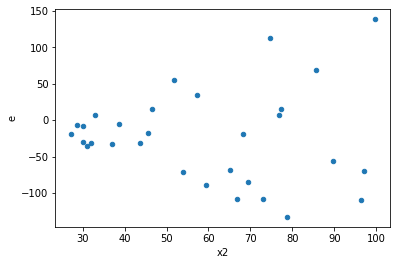

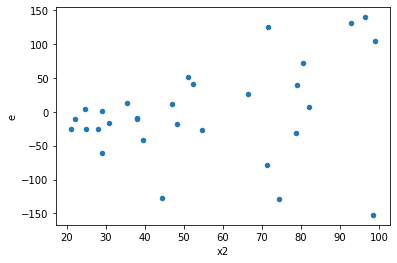

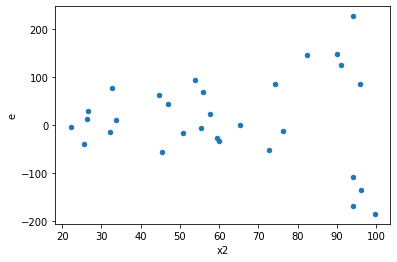

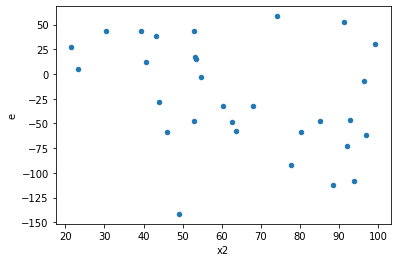

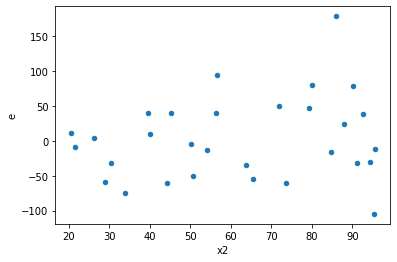

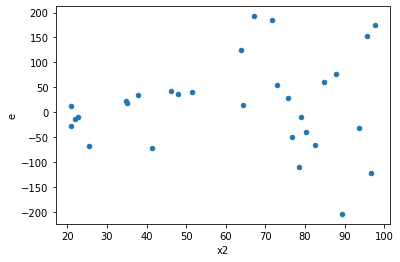

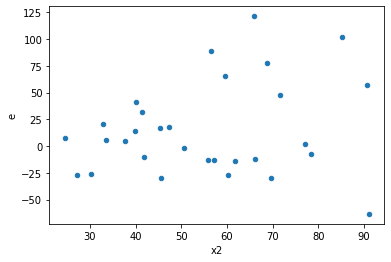

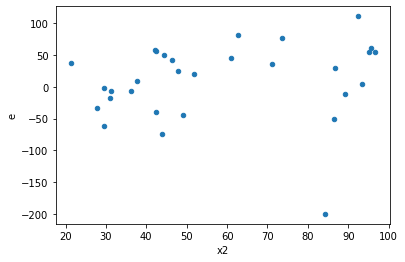

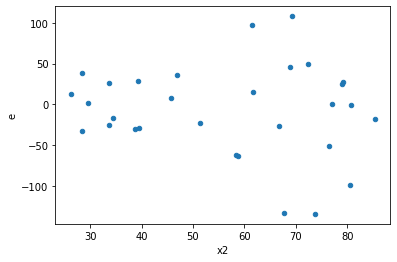

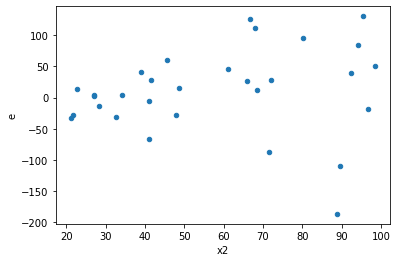

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,14.0,12.0,17387.45475013841,111869.06964632763,1241.9610535813151,9322.422470527303,7.5062116027271495,0.001237179988356596,0.9993814100058217,0.000618589994178298,Reject001=0 : Heteroscedasticity
4.0,9.0,17.0,15044.11832557023,83223.76227706818,1671.5687028411367,4895.515428062834,2.9286953146119634,0.054019284673570755,0.9729903576632146,0.027009642336785378,Reject001=1 : Homoscedasticity
5.0,9.0,17.0,9802.566699208313,210383.11602762633,1089.1740776898125,12375.477413389784,11.362258491901251,2.7591660038739363e-05,0.9999862041699806,1.3795830019369681e-05,Reject001=0 : Heteroscedasticity
6.0,6.0,20.0,4896.2021633549975,46376.50457242584,816.0336938924996,2318.825228621292,2.841580250884546,0.07248904242357468,0.9637554787882127,0.03624452121178734,Reject001=1 : Homoscedasticity
10.0,9.0,17.0,12202.689240851018,126697.45823467242,1355.8543600945575,7452.791660863084,5.49674941513875,0.0025852595054707272,0.9987073702472646,0.0012926297527353636,Reject001=0 : Heteroscedasticity
11.0,16.0,10.0,33242.266315675995,23474.698758966344,2077.6416447297497,2347.469875896634,1.1298723636250478,0.8692104764795205,0.5653947617602397,0.43460523823976027,Reject001=1 : Homoscedasticity
13.0,12.0,14.0,19331.316189969093,29467.167788686857,1610.9430158307578,2104.797699191918,1.3065624783173855,0.6264029141337346,0.6867985429331327,0.3132014570668673,Reject001=1 : Homoscedasticity
14.0,13.0,13.0,22121.603154441145,74523.02887361695,1701.6617811108574,5732.540682585919,3.3687897008791454,0.036791374756203865,0.9816043126218981,0.018395687378101933,Reject001=1 : Homoscedasticity
17.0,17.0,9.0,39442.811105068206,50310.61681672215,2320.165359121659,5590.06853519135,2.409340572737269,0.18102381893315167,0.9094880905334242,0.09051190946657584,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,16.0,10.0,97783.65744345463,2601.234301315265,6111.478590215915,260.1234301315265,0.04256309275924936,2.1415416398439282e-07,Reject001=0 : Heteroscedasticity
1.0,14.0,12.0,17387.45475013841,111869.06964632763,1241.9610535813151,9322.422470527303,7.5062116027271495,0.001237179988356596,Reject001=0 : Heteroscedasticity
2.0,20.0,6.0,112759.16262401204,13680.673324318901,5637.958131200602,2280.112220719817,0.40442163060800657,0.11854225214517418,Reject001=1 : Homoscedasticity
3.0,17.0,9.0,50043.466005880415,18871.898422792765,2943.7332944635536,2096.8776025325296,0.71231915149251,0.5224991362842496,Reject001=1 : Homoscedasticity
4.0,9.0,17.0,15044.11832557023,83223.76227706818,1671.5687028411367,4895.515428062834,2.9286953146119634,0.054019284673570755,Reject001=1 : Homoscedasticity
5.0,9.0,17.0,9802.566699208313,210383.11602762633,1089.1740776898125,12375.477413389784,11.362258491901251,2.7591660038739363e-05,Reject001=0 : Heteroscedasticity
6.0,6.0,20.0,4896.2021633549975,46376.50457242584,816.0336938924996,2318.825228621292,2.841580250884546,0.07248904242357468,Reject001=1 : Homoscedasticity
7.0,9.0,17.0,51992.7335707502,27083.921647595904,5776.970396750022,1593.1718616232884,0.2757798209455196,0.05434277215465432,Reject001=1 : Homoscedasticity
8.0,15.0,11.0,61418.88073335777,8528.603995404064,4094.592048890518,775.327635945824,0.18935406181817524,0.0037065960431966597,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      778
Reject001=0 : Heteroscedasticity    222
Name: Result_test, dtype: int64